In [40]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [8]:
df=pd.read_csv("bank_churn1.csv")
df.head()

,Unnamed: 0,customer_id,credit_score,Score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Income_Level
0,0,15634602,619,moderate,France,Female,42,2,0.00,1,1,1,101348.88,1,Medium
1,1,15647311,608,moderate,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Medium
2,2,15619304,502,Not pleasing,France,Female,42,8,159660.80,3,1,0,113931.57,1,Medium
3,3,15701354,699,moderate,France,Female,39,1,0.00,2,0,0,93826.63,0,Low
4,4,15737888,850,Excellent,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Low


In [9]:
data = df.copy()

In [10]:
data=data.drop("Unnamed: 0",axis=1)

In [11]:
data.head()

,customer_id,credit_score,Score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Income_Level
0,15634602,619,moderate,France,Female,42,2,0.00,1,1,1,101348.88,1,Medium
1,15647311,608,moderate,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Medium
2,15619304,502,Not pleasing,France,Female,42,8,159660.80,3,1,0,113931.57,1,Medium
3,15701354,699,moderate,France,Female,39,1,0.00,2,0,0,93826.63,0,Low
4,15737888,850,Excellent,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Low


In [12]:
corr = data.corr()

In [13]:
cor_target= abs(corr['churn'])
relevant_features= cor_target[cor_target> 0.1]
relevant_features

age              0.285323
balance          0.118533
active_member    0.156128
churn            1.000000
Name: churn, dtype: float64

In [14]:
columns_to_drop = ['Score', 'Income_Level']
data.drop(columns_to_drop, axis = 1, inplace= True)


In [15]:
data = pd.get_dummies(data)
data

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_for_scaling = ['credit_score','age','estimated_salary','balance','products_number','tenure']
data[columns_for_scaling] = sc.fit_transform(data[columns_for_scaling])

In [17]:
data

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1.246488,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,0,1,0,0,0,1
9996,15569892,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,0,1,0,0,0,1
9997,15584532,0.604988,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,1,0,0,1,0
9998,15682355,1.256835,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,1,0,1,0,0,1


In [18]:
data.columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'country_France', 'country_Germany', 'country_Spain',
       'gender_Female', 'gender_Male'],
      dtype='object')

### using a balanced dataset for model biluding

In [19]:
x=data.drop(['churn','customer_id'],axis=1)
x

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,0,1,0,0,1


In [20]:
y=data['churn']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Models Training

#### Decision Tree Classifier

In [22]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [23]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [24]:
#Predict the value for new, unseen data
dt_pred=model_dt.predict(x_test)
# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

In [25]:
model_dt.score(x_test,y_test)

0.851

In [26]:
# Machine Learning classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [27]:
#Fit the logistic Regression Model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(x_train,y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(x_test)

# Find Accuracy using accuracy_score method
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)


In [28]:
#Fit the Support Vector Machine Model
svcmodel = SVC(kernel='linear', random_state=50, probability=True)
svcmodel.fit(x_train,y_train)

#Predict the value for new, unseen data
svc_pred = svcmodel.predict(x_test)

# Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)


In [29]:
#Fit the K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
knnmodel.fit(x_train, y_train) 
  
#Predict the value for new, unseen data
knn_pred = knnmodel.predict(x_test)

# Find Accuracy using accuracy_score method
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

In [30]:
#Fit the Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(x_train, y_train) 
  
#Predict the value for new, unseen data
rf_pred = rfmodel.predict(x_test)

# Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

In [31]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest'],
    'Score': [logmodel_accuracy,svc_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,85.75,Random Forest
1,85.10,Decision Tree
2,83.40,K-Nearest Neighbor
3,80.35,Logistic Regression
4,78.95,Support Vector Machine


* since the data had some outliers we might consider the svm model as it is comparatively less prone to outliers than logistic regression as it only cares about the points that are closest to the decision boundary or support vectors.


In [32]:
#Generate confusion matrix for Decision Treee  model as it has maximum Accuracy
from sklearn.metrics import confusion_matrix
conf_mat_dtmodel = confusion_matrix(y_test, dt_pred)
conf_mat_dtmodel

array([[1519,   60],
       [ 238,  183]], dtype=int64)

In [44]:
import seaborn as sns

In [45]:
def plot_heatmap(confusion_matrix,title):
    df= pd.DataFrame(confusion_matrix,index=["True Positive", "True Negative"])
    df.columns=["True Positive", "True Negative"]
    ax=plt.axes()
    sns.heatmap(df, annot=True, fmt="d",ax=ax)
    ax.set_title(title)
    plt.show()
    return

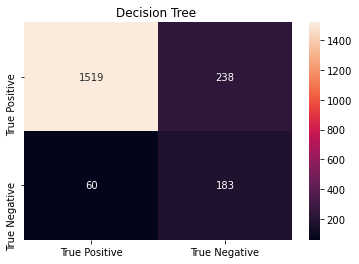

In [47]:
plot_heatmap(confusion_matrix(dt_pred,y_test),"Decision Tree ")

In [53]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1563
           1       0.78      0.42      0.55       437

    accuracy                           0.85      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.84      0.85      0.83      2000



In [55]:
# Predict the probability of Churn of each customer
df['Probability_of_Churn'] = model_dt.predict_proba(data[x_test.columns])[:,1]

In [56]:
# Create a Dataframe showcasing probability of Churn of each customer
df[['customer_id','Probability_of_Churn']].head(20)

,customer_id,Probability_of_Churn
0,15634602,0.156250
1,15647311,0.081891
2,15619304,1.000000
3,15701354,0.031546
4,15737888,0.201780
5,15574012,0.282828
6,15592531,0.063348
7,15656148,0.846154
8,15792365,0.251337
9,15592389,0.081891


In [57]:
data.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0
